In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

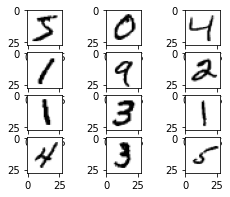

In [3]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [9]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ['accuracy']
)

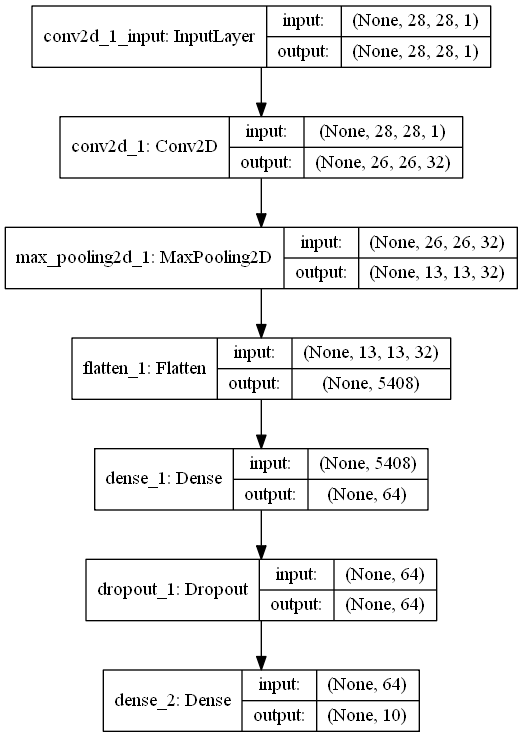

In [10]:
tf.keras.utils.plot_model(model, "aigroup8-mnist.png", show_shapes = True, show_layer_names = True)

In [11]:
history = model.fit(
    X_train,
    y_train,
    verbose = 2,
    epochs = 5,
    batch_size = 16,
    validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 39s - loss: 0.3300 - accuracy: 0.8987 - val_loss: 0.1023 - val_accuracy: 0.9697
Epoch 2/5
 - 37s - loss: 0.1693 - accuracy: 0.9486 - val_loss: 0.0849 - val_accuracy: 0.9764
Epoch 3/5
 - 36s - loss: 0.1312 - accuracy: 0.9597 - val_loss: 0.0770 - val_accuracy: 0.9772
Epoch 4/5
 - 39s - loss: 0.1148 - accuracy: 0.9644 - val_loss: 0.0830 - val_accuracy: 0.9762
Epoch 5/5
 - 41s - loss: 0.0944 - accuracy: 0.9690 - val_loss: 0.0776 - val_accuracy: 0.9797


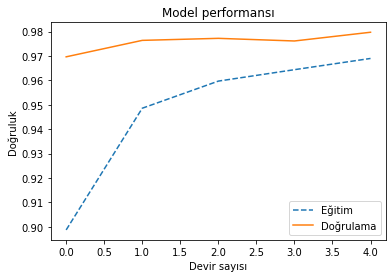

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

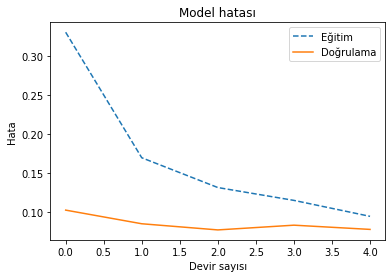

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'upper right')
plt.show()

In [35]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı : %.2f%%" % (performans[1]*100))

Modelin test performansı : 98.05%


In [36]:
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [37]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [38]:
X_train.shape

(25000,)

In [39]:
X_test.shape

(25000,)

In [41]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)

print("Eğitim kümemizin son hali : \n", X_train)

Eğitim kümemizin son hali : 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [42]:
X_train.shape

(25000, 500)

In [44]:
import warnings
warnings.filterwarnings("ignore")
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

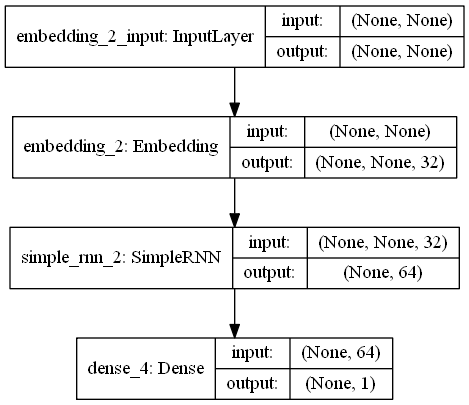

In [45]:
tf.keras.utils.plot_model(model, "AIGroup8_SimpleRNN.png", show_shapes = True, show_layer_names = True)

In [46]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.6764 - accuracy: 0.5706 - val_loss: 0.6711 - val_accuracy: 0.5904
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6179 - accuracy: 0.6890 - val_loss: 0.6008 - val_accuracy: 0.6748
Epoch 3/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.5079 - accuracy: 0.7681 - val_loss: 0.5368 - val_accuracy: 0.7314
Epoch 4/10
20000/20000 [==============================] - 33s 2ms/step - loss: 0.5087 - accuracy: 0.7437 - val_loss: 0.6000 - val_accuracy: 0.6628
Epoch 5/10
20000/20000 [==============================] - 36s 2ms/step - loss: 0.5292 - accuracy: 0.7490 - val_loss: 0.5712 - val_accuracy: 0.6904
Epoch 6/10
20000/20000 [==============================] - 34s 2ms/step - loss: 0.4661 - accuracy: 0.7922 - val_loss: 0.5435 - val_accuracy: 0.7184
Epoch 7/10
20000/20000 [==============================] - 34s 2ms/ste

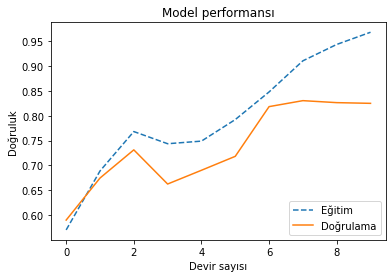

In [47]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

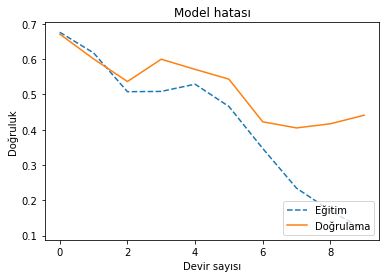

In [48]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model hatası")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

In [49]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin test performansı : %.2f%%" % (performans[1]*100))

Modelin test performansı : 82.49%
